In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# List of file names
file_names = [
    "excllev_summary_Riemann_bbcpy.csv",
    "excllev_summary_TRiemann_bbcpy.csv",
    "excllev_summary_csp_bbcpy.csv",
]

In [34]:
def plot_excellv_comparison(run_path, configuration):
    file_names = [
    "excllev_summary_Riemann_bbcpy.csv",
    "excllev_summary_TRiemann_bbcpy.csv",
    "excllev_summary_csp_bbcpy.csv",
    ]

    # Load data from each file
    dfs = []
    for file_name in file_names:
        model_name = file_name.split("_")[-2].split(".")[0]
        file_path = os.path.join(run_path, file_name)
        df = pd.read_csv(file_path, skiprows=3, header=None)
        df.columns = ["excllev", "mean", "std"]
        df["model"] = model_name
        dfs.append(df)
    
    # Concatenate all dataframes
    df_combined = pd.concat(dfs)

    # Convert columns to appropriate data types if necessary
    df_combined["excllev"] = df_combined["excllev"].astype(float)
    df_combined["mean"] = df_combined["mean"].astype(float)
    df_combined["std"] = df_combined["std"].astype(float)

    # Create a grouped bar plot
    excllev_values = df_combined["excllev"].unique()
    models = df_combined["model"].unique()
    num_models = len(models)
    
    bar_width = 0.2
    index = np.arange(len(excllev_values))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, model in enumerate(models):
        subset = df_combined[df_combined["model"] == model]
        bars = ax.bar(index + i * bar_width, subset["mean"], yerr=subset["std"], width=bar_width, label=model)
    
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)
    
    
    
    ax.set_xlabel("excllev")
    ax.set_ylabel("Score")
    ax.set_title(configuration)
    ax.set_xticks(index + bar_width * num_models / 2)
    ax.set_xticklabels(excllev_values)
    # Move the legend outside the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=num_models)
    plt.show()

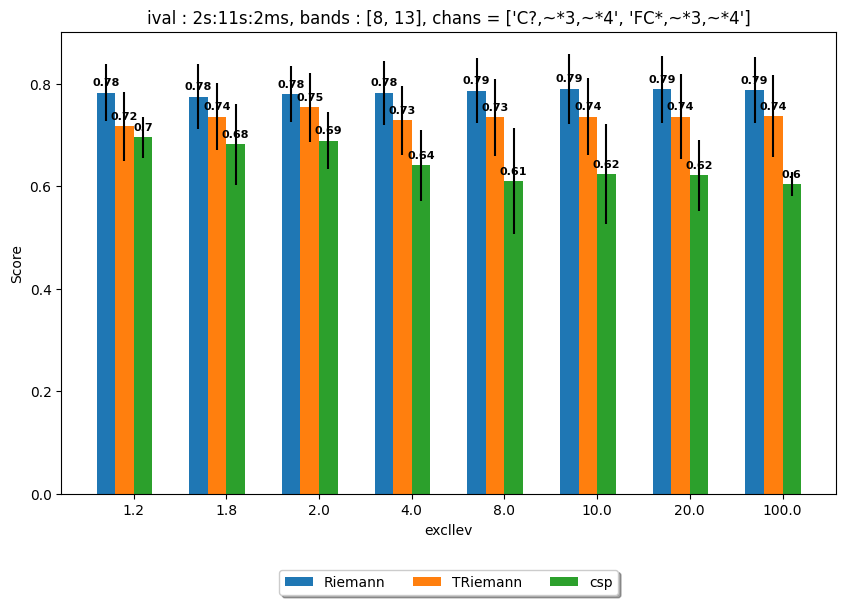

In [35]:
run_1_path = './LR_results/run_1/'
configuration_1 = "ival : 2s:11s:2ms, bands : [8, 13], chans = ['C?,~*3,~*4', 'FC*,~*3,~*4']" 

plot_excellv_comparison(run_1_path, configuration_1)

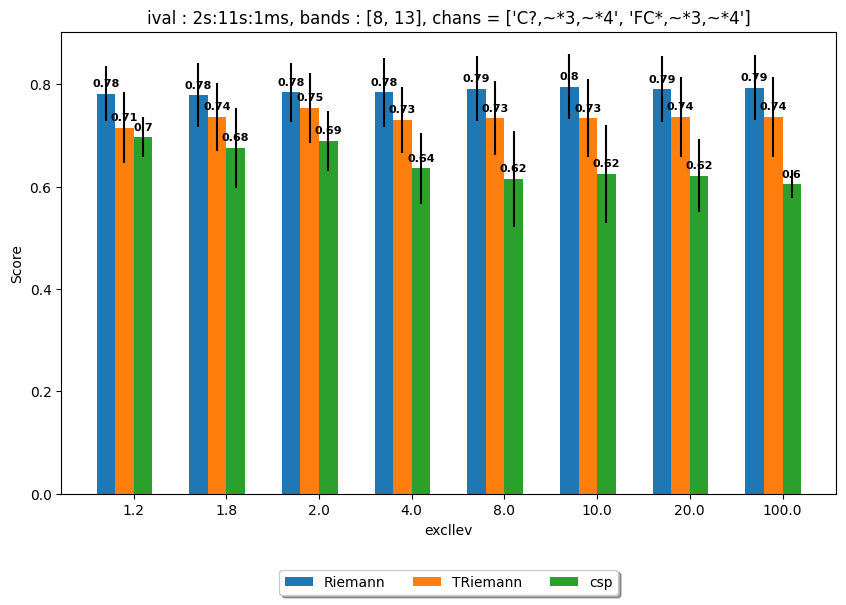

In [36]:
run_1_path = './LR_results/run_2/'
configuration_1 = "ival : 2s:11s:1ms, bands : [8, 13], chans = ['C?,~*3,~*4', 'FC*,~*3,~*4']" 

plot_excellv_comparison(run_1_path, configuration_1)

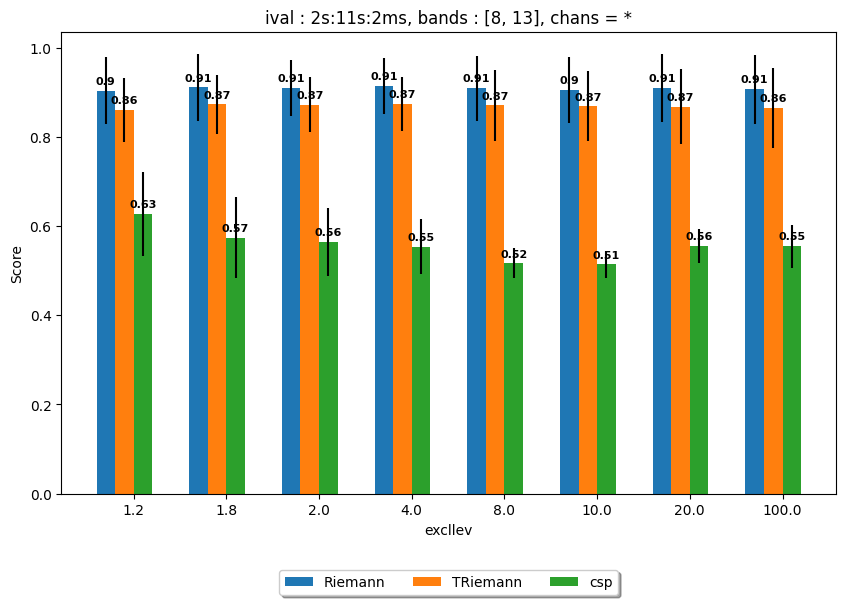

In [37]:
run_1_path = './LR_results/run_3/'
configuration_1 = "ival : 2s:11s:2ms, bands : [8, 13], chans = *" 
plot_excellv_comparison(run_1_path, configuration_1)

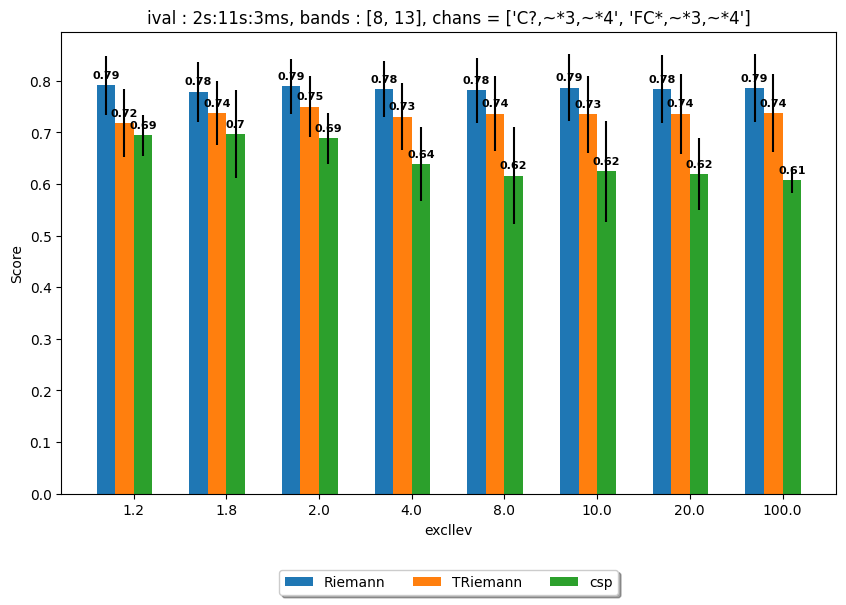

In [38]:
run_1_path = './LR_results/run_4/'
configuration_1 = "ival : 2s:11s:3ms, bands : [8, 13], chans = ['C?,~*3,~*4', 'FC*,~*3,~*4']" 
plot_excellv_comparison(run_1_path, configuration_1)

In [ ]:
ival = "2s:11s:2ms"
bands = [8, 13]
chans = ['C?,~*3,~*4', 'FC*,~*3,~*4']

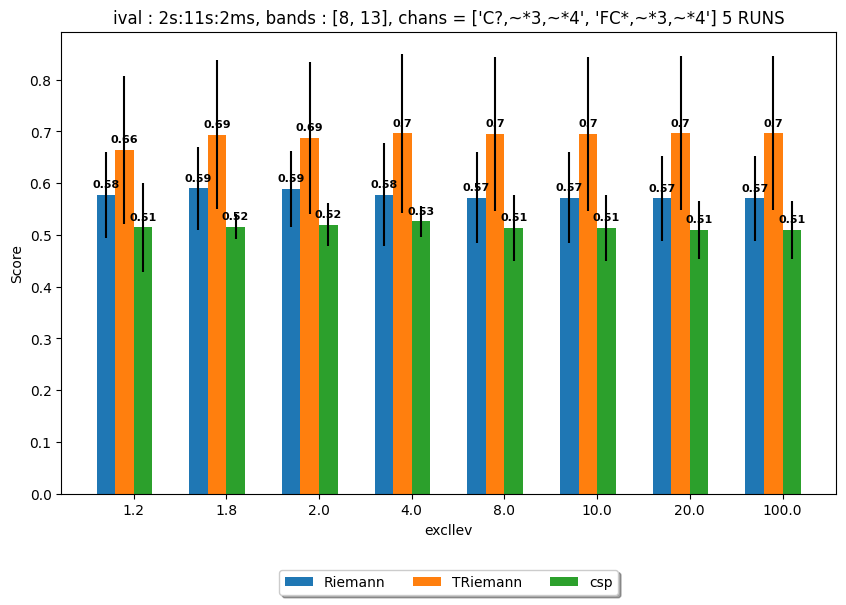

In [44]:
run_1_path = './LR_results/run_5/'
configuration_1 = "ival : 2s:11s:2ms, bands : [8, 13], chans = ['C?,~*3,~*4', 'FC*,~*3,~*4'] 5 RUNS" 
plot_excellv_comparison(run_1_path, configuration_1)